<a href="https://colab.research.google.com/github/leejyy/Assignment/blob/master/Decision_Trees_and_Random_Forest_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projects/tree/loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to wait a bit and reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

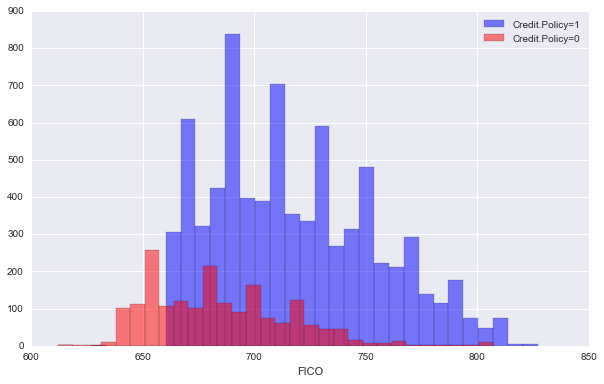

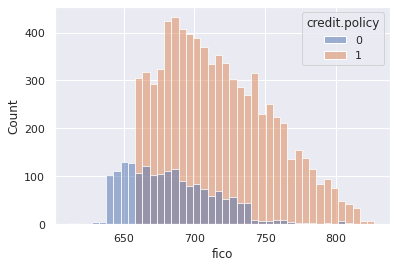

In [10]:
sns.set_style=('Whitegrid')
sns.histplot(data=df,x='fico',hue='credit.policy')

** Create a similar figure, except this time select by the not.fully.paid column.**

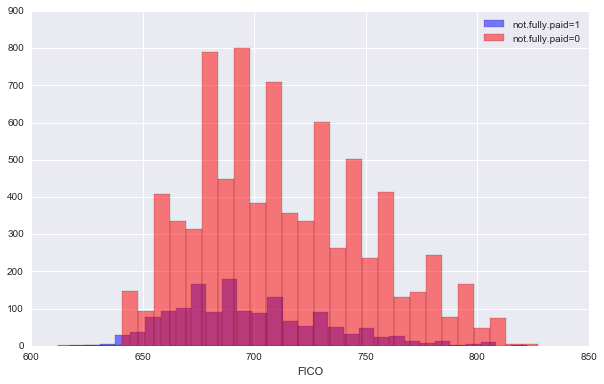

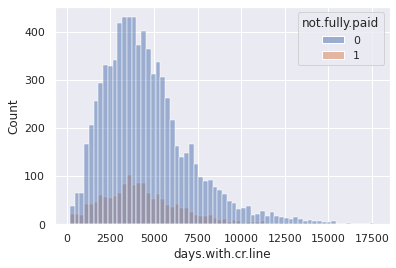

In [14]:
sns.set_style=('Whitegrid')
sns.histplot(data=df,x='days.with.cr.line',hue='not.fully.paid')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

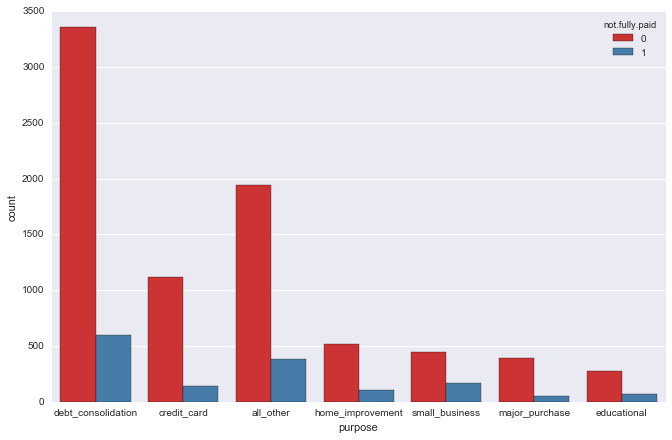

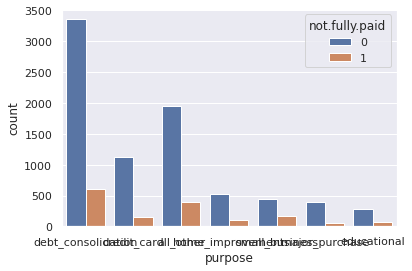

In [13]:
sns.set_style=('Whitegrid')
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

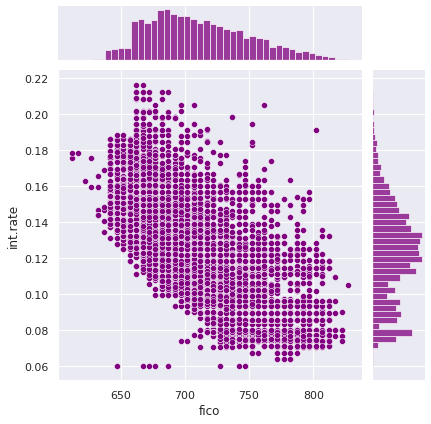

In [15]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 720x432 with 0 Axes>

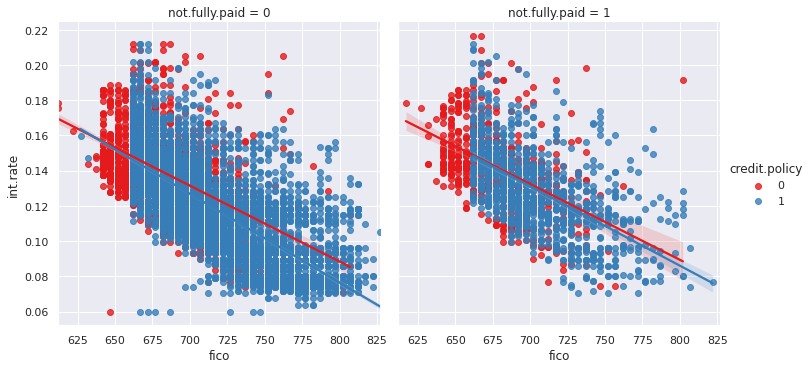

In [23]:
plt.figure(figsize=(10,6))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [20]:
cat_feats = ['purpose']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [25]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [26]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [27]:
from sklearn.model_selection import train_test_split

In [ ]:
X=final_data.drop('not.')
y=ad_data['Clicked on Ad']

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.16      0.20      0.18       443

avg / total       0.74      0.72      0.73      2874



[[1980  451]
 [ 355   88]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

[[2427    4]
 [ 438    5]]


**What performed better the random forest or the decision tree?**

#Cheers!